# Import Libraries and Data

In [11]:
pip install --upgrade scikit-learn

     ---------------------------------------- 10.6/10.6 MB 8.7 MB/s eta 0:00:00
     -------------------------------------- 302.2/302.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd # dataframe/data cleaning/manipulation
import numpy as np # array computations
from matplotlib import pyplot as plt # plotting/graphing
import matplotlib.patches as mpatches
from sklearn.tree import plot_tree, export_text, DecisionTreeClassifier # Decision tree algorithm and plotting functions for the Decision tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier # Bagging, Random Forest, and Boosting algorithms
from sklearn.linear_model import LogisticRegression # Logistic Regression Algorithm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict # train test split and cross validation accuracy/prediction functions
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, roc_auc_score # Various model evaluation metrics
import warnings
warnings.filterwarnings('ignore')

Note: If you are using Google Colab, you must upload the `hr.csv` file from Canvas by doing the following:

* On the left-side bar, click the folder icon.
* Click the 'Upload to session storage' button.
* Upload the CSV file; it will appear below the 'sample_data' folder.

**Unfortunately, this process must be done every time the runtime is disconnected - just a quirk with Google Colab.**

If you are using Jupyter notebook, just make sure the CSV file is in the same folder location as this .ipynb file.

In [2]:
hr_df = pd.read_csv('hr.csv',index_col=0)

# These objects will be used to create visualizations later.

col_val = hr_df.columns.tolist()

meta = [('\ufeffAge', 'NUMERIC'), ('BusinessTravel', ['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']),
 ('DailyRate', 'NUMERIC'), ('Department', ['Sales', 'Research & Development', 'Human Resources']), ('DistanceFromHome', 'NUMERIC'), ('Education', 'NUMERIC'),
  ('EducationField', ['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']), ('EmployeeCount', 'NUMERIC'),
   ('EmployeeNumber', 'NUMERIC'), ('EnvironmentSatisfaction', 'NUMERIC'), ('Gender', ['Female', 'Male']), ('HourlyRate', 'NUMERIC'), ('JobInvolvement', 'NUMERIC'),
    ('JobLevel', 'NUMERIC'),
     ('JobRole', ['Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', 'Human Resources']),
      ('JobSatisfaction', 'NUMERIC'), ('MaritalStatus', ['Single', 'Married', 'Divorced']),
       ('MonthlyIncome', 'NUMERIC'), ('MonthlyRate', 'NUMERIC'), ('NumCompaniesWorked', 'NUMERIC'),
        ('Over18', ['Y']), ('OverTime', ['Yes', 'No']), ('PercentSalaryHike', 'NUMERIC'), ('PerformanceRating', 'NUMERIC'), ('RelationshipSatisfaction', 'NUMERIC'),
         ('StandardHours', 'NUMERIC'), ('StockOptionLevel', 'NUMERIC'), ('TotalWorkingYears', 'NUMERIC'), ('TrainingTimesLastYear', 'NUMERIC'),
          ('WorkLifeBalance', 'NUMERIC'), ('YearsAtCompany', 'NUMERIC'), ('YearsInCurrentRole', 'NUMERIC'), ('YearsSinceLastPromotion', 'NUMERIC'),
           ('YearsWithCurrManager', 'NUMERIC'), ('Attrition', ['Yes', 'No'])]

# Visualize Data and Attributes


We are now working with a new dataset from a Human Resources Department keeping data on employee attrition. We are aiming to predict whether or not an employee will choose to leave the company (Attrition) based on 34 different features, such as age, how often they travel for business, and job satisfaction. The first 5 rows of the dataset are shown below.

In [3]:
hr_df.head()

,﻿Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41.0,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,1
1,37.0,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,...,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1
2,28.0,Travel_Rarely,103.0,Research & Development,24.0,3.0,Life Sciences,1.0,19.0,3.0,...,80.0,0.0,6.0,4.0,3.0,4.0,2.0,0.0,3.0,1
3,36.0,Travel_Rarely,1218.0,Sales,9.0,4.0,Life Sciences,1.0,27.0,3.0,...,80.0,0.0,10.0,4.0,3.0,5.0,3.0,0.0,3.0,1
4,34.0,Travel_Rarely,699.0,Research & Development,6.0,1.0,Medical,1.0,31.0,2.0,...,80.0,0.0,8.0,2.0,3.0,4.0,2.0,1.0,3.0,1


Before going further, we also need to convert all of our categorical variables into dummy variables, as Scikit-Learn can only work with numeric values and True/False (or 0 and 1) values. We can achive this with [pd.get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).

In [4]:
hr_df_binarized = pd.get_dummies(hr_df)

By binarizing our dataset, now we have 54 different features to work with. The first 5 rows of the dataset after this change are shown below.

**Note:** All of the variables affected by `pd.get_dummies()` were pushed to the right side of our dataframe.

In [5]:
hr_df_binarized.head()

,﻿Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y
0,41.0,1102.0,1.0,2.0,1.0,1.0,2.0,94.0,3.0,2.0,...,0,0,0,0,1,0,0,0,1,1
1,37.0,1373.0,2.0,2.0,1.0,4.0,4.0,92.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,1
2,28.0,103.0,24.0,3.0,1.0,19.0,3.0,50.0,2.0,1.0,...,0,0,0,0,0,0,0,0,1,1
3,36.0,1218.0,9.0,4.0,1.0,27.0,3.0,82.0,2.0,1.0,...,0,0,0,0,0,1,0,0,1,1
4,34.0,699.0,6.0,1.0,1.0,31.0,2.0,83.0,3.0,1.0,...,0,0,0,1,0,0,0,0,1,1


The function display_attribute() below is nearly identical to the one used in the DecisionTree_LogisticRegression_Final.ipynb file, specifically comparing the distribution of the Attrition attribute to the other features in the dataset.

**As before you do not need to understand how the function works; mainly focus on the output below.**

In [6]:
def display_attribute(df, meta, col_name):
  attr = df.loc[df['Attrition'] == 1]
  attr_col_name = []
  no_attr_col_name = []
  if type(meta[col_val.index(col_name)][1]) == list:
    labels = meta[col_val.index(col_name)][1]
    for label in labels:
      no_attr_col_name.append(len(df.loc[df[col_name] == label]))
      attr_col_name.append(len(attr.loc[attr[col_name] == label]))

  else:
    labels = []
    min_val = int(min(df[col_name]))
    max_val = int(max(df[col_name]))
    rg = max_val - min_val
    if rg < 12:
      for x in range(min_val, max_val + 1):
        no_attr_col_name.append(len(df.loc[df[col_name] == x]))
        attr_col_name.append(len(attr.loc[attr[col_name] == x]))
        labels.append(x)
    else:
      for y in range(min_val, max_val, (rg//8)):
        no_attr_col_name.append(len(df.loc[df[col_name].between(y, y + (rg//8))]))
        attr_col_name.append(len(attr.loc[attr[col_name].between(y, y + (rg//8))]))
        labels.append(f"{y}-{y+(rg//8-1)}")

  if type(labels[0]) != str:
    labels = [str(label) for label in labels]
  plt.figure(dpi = 150)
  plt.bar(labels, no_attr_col_name, label = 'No attrition')
  plt.bar(labels, attr_col_name, label = 'Yes attrition')
  plt.legend()
  plt.title(f'{col_name} distribution')
  plt.show()

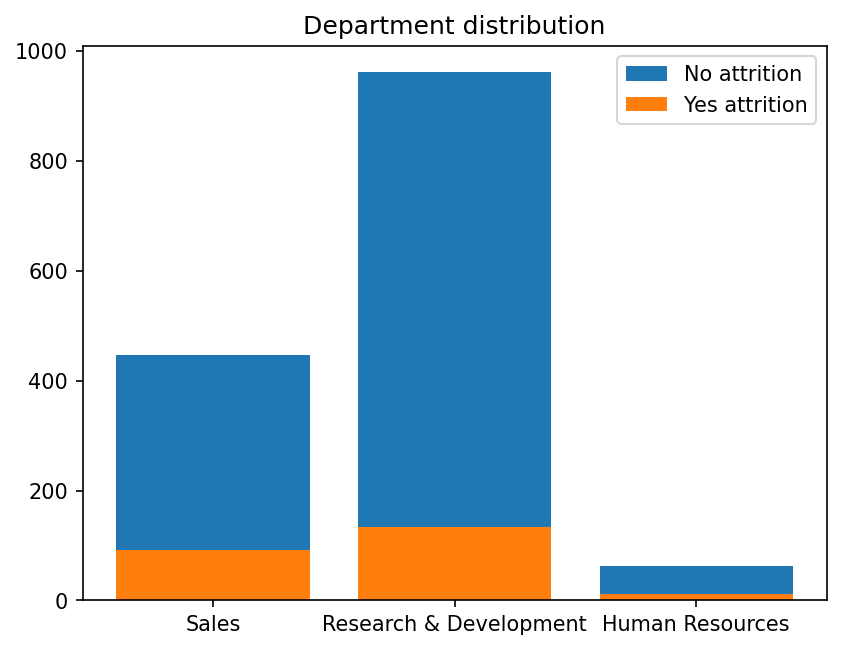

In [7]:
plt.rcdefaults()
display_attribute(hr_df, meta, 'Department') # Change third parameter to change attribute

What takeaways can we make from this plot?

# Create Function - Model Evaluation

The goal for this Python notebook is to explore the various ensemble models discussed in class. While we won't need a sample model to work with this time around, we will need to evaluate our models on multiple occasions. As we have gone over various model evaluation metrics of interest, rather than writing a line of code for each metric we are interested in, we can combine them into a function that only needs to be called once for each model! This is achieved below with the `report_score` function.

**Note:** We use the [cross_val_predict()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) function to peform cross validation and give us the out-of-sample predictions for each data point in the dataset as opposed to just the accuracy or ROC AUC %. It's as if each prediction was made when its corresponding data point was not part of the training set. This method is useful for evaluating the model performance in a way that's more robust against overfitting, **especially if we don't have a separate test set.** It simulates the scenario where each sample in the dataset has been in a test set.

In [8]:
def report_score(mymodel, X, y, mycv):
# To use this function, all we need to do is feed it our model of interest, X, y, and the number of folds for cross-validation.

    # Calculate and print the cross-validation accuracy
    cross_val_accuracy = round(cross_val_score(mymodel, X, y, cv = mycv).mean()*100,2)
    print(f"{mycv}-Fold Cross-Validation Classification Accuracy: {cross_val_accuracy:.2f} %")

    # Calculate and print the cross-validation ROC AUC
    cross_val_accuracy_roc_auc = round(cross_val_score(mymodel, X, y, cv =  mycv, scoring = 'roc_auc').mean()*100,2)
    print(f"\n{mycv}-Fold Cross-Validation ROC AUC: {cross_val_accuracy_roc_auc:.2f} %")

    # Calculate the confusion matrix and print the true positives/negatives and false positives/negatives
    predictions = cross_val_predict(mymodel, X, y, cv = mycv)
    confusion = confusion_matrix(y, predictions)
    tn, fp, fn, tp = confusion.ravel()
    print(f"\nTrue Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")

    # Calculate and print precision and recall:
    print("\nPrecision:", round(precision_score(y, predictions)*100,2))
    print("\nRecall:", round(recall_score(y, predictions)*100,2))

We will also define our features and target variable from our dataset.

In [9]:
X = hr_df_binarized.drop(columns=['Attrition'])
y = hr_df_binarized.Attrition

# Create and Evaluate Model - Bagging

Now, we are ready to create our first [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) model. In short, bagging utilizes the concept of bootstrapping to perform four steps:

1. Start by randomly selecting N subsets from the original dataset, allowing for repetition.

2. Develop a distinct model from each of these subsets.

3. Let each model cast a vote by predicting the outcome for a specific test instance, resulting in N votes from N models.

4. Consolidate the votes from all models to arrive at a final, singular prediction.

As a result, bagging typically enhances the precision predictions! A group of models reduces the risk of a single model fitting too closely to an anomaly in a dataset and weakens the influence of outliers.

Bagging is a technique that can be applied to many different models. Thus, when instantiating a model, we can set a base model for it to use with the `estimator` parameter. The default base model is a [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). Additionally, we can set the number of bags (or estimators) to be used with the `n_estimators` parameter. Let's try a few variations.

First, let's create a bagging model with 30 estimators using the decision tree settings we have been using previously for the British Bank Dataset for our base model.

In [14]:
base_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state = 3)
bagging_model = BaggingClassifier(base_estimator = base_model, n_estimators = 30, random_state = 3).fit(X, y)
report_score(bagging_model, X, y, 10)

10-Fold Cross-Validation Classification Accuracy: 86.19 %

10-Fold Cross-Validation ROC AUC: 77.63 %

True Negatives: 1213, False Positives: 20, False Negatives: 183, True Positives: 54

Precision: 72.97

Recall: 22.78


Next, let's create a bagging model with 10 estimators using a [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) algorithm for our base model instead.

**Note:** This may take longer as the data may not be scaled properly for a logistic regression algorithm.

In [15]:
base_model = LogisticRegression(random_state = 3)
bagging_model = BaggingClassifier(base_estimator = base_model, n_estimators = 10, random_state = 3).fit(X, y)
report_score(bagging_model, X, y, 10)

10-Fold Cross-Validation Classification Accuracy: 84.08 %

10-Fold Cross-Validation ROC AUC: 68.83 %

True Negatives: 1232, False Positives: 1, False Negatives: 233, True Positives: 4

Precision: 80.0

Recall: 1.69


Lastly, we can create a nested bagging model, or a "bag of bags" where we create an initial bagging model that is based off say, a decision tree, and then create a secondary bagging model that uses our initial bagging model as the base model!

In [1]:
base_model = DecisionTreeClassifier(random_state = 3)
bagging_model_initial = BaggingClassifier(base_estimator = base_model, n_estimators = 10, random_state = 3).fit(X, y)
report_score(bagging_model_nested, X, y, 10)

NameError: name 'DecisionTreeClassifier' is not defined

Feel free to experiment with different base models and settings for the bagging model to see if you can get better results than the variations shown above!

# Create and Evaluate Model - Random Forest

The next type of ensemble model is the [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Unlike bagging models, a Random Forest is limited to decision trees only, but takes further steps to reduce the risk of overfitting. It can be thought up as a step-up from bagging.

Random Forests introduce an additional layer of randomness by not utilizing all available features when forming each tree in its ensemble. Additionally, only a random subset of features is evaluated at each split in the tree, which decreases the chance of the model relying on the same feature to capture a spurious pattern across numerous trees.

**As a result, we end up exploring trees we may never come across using a standard, greedy approach while also reducing correlation between trees. This reduces variations in predictions without comprising individual accuracy.**


When creating a random forest model, here are some of the estimators we can specify:

- The number of trees in the forest through `n_estimators`
- The splitting criterion for each tree, through `criterion`
- The maximum depth for each tree, through `max_depth`
- The minimum samples required to split an internal node and the number of samples required in a leaf node through `min_samples_split` and `min_samples_leaf` respectively
- The maximum number of random features to consider when looking for the best next split in a tree, through `max_features`

Let's instantiate and evaluate a random forest that makes splits to maximize entropy, has 100 trees in the forest, and picks 6 random reatures to consider when looking for each next best split for the trees.

In [ ]:
random_forest_model = RandomForestClassifier(criterion = 'entropy', n_estimators = 100, max_features = 6).fit(X,y)
report_score(random_forest_model, X, y, 10)

Like the bagging models, feel free to experiment with different settings for the random forest to see if you can get better results!

# Create and Evaluate Model - Boosting

A third type of ensemble technique is known as Boosting. Essentially, boosting involves combining various "weak learners" such as shallow or underfitted trees, to form a strong predictive model. Paradoxically, this model achives both low bias and low variance.

Each model is added sequentiallly and with each step, the boosting model as a whole becomes more complex and better adapted to the dataset. Successive models in boosting focus on the errors of the previous models, and each model in the ensemble aims to correct the mistakes made by previous models.

Like bagging, boosting can be applied to various models besides trees. However, boosting assigns higher weights to the instances that were misclassified by earlier models, increasing the stakes for the subsequent models to get them right. Each model has a different weight, which reflects their accuracy in predicting an outcome; more accurate models have a bigger say in the final prediction.


**Two libraries in Sci-Kit Learn that can perform boosting are the [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) and the [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).**

While AdaBoost a fairly standard boosting algorithm, Gradient Boosting differs in that instead of tweaking the instance weights, it fits the new model to the residual errors made by the previous models. Gradient Boosting also involves the minimization of a loss function (like mean squared error for regression). Each new model is trained to reduce the residual loss from the previous models. Moreover, it often includes a learning rate (shrinkage) that scales the contribution of each tree. This helps in improving model robustness by slowing down the learning process.

**In short, AdaBoost is simpler and often faster, which can be effective on datasets where correcting misclassified instances is crucial. Gradient Boosting is more flexible and can be more powerful, but it requires careful tuning to avoid overfitting and can be computationally more intensive.**



Below, we have fit an AdaBoost model and a Gradient Boosting model with some basic parameters. Geel free to experiment with different settings for these algorithms to see if you can get better results!

In [ ]:
adaboost_model = AdaBoostClassifier(algorithm="SAMME.R", n_estimators=20, random_state = 3)
report_score(adaboost_model, X, y, 10)

In [18]:
adaboost_model = AdaBoostClassifier(algorithm="SAMME.R", n_estimators=20, random_state = 3)
bagging_model_nested = BaggingClassifier(base_estimator = adaboost_model, n_estimators=20, random_state = 3)
report_score(bagging_model_nested, X, y, 10)

10-Fold Cross-Validation Classification Accuracy: 87.21 %

10-Fold Cross-Validation ROC AUC: 82.26 %

True Negatives: 1224, False Positives: 9, False Negatives: 179, True Positives: 58

Precision: 86.57

Recall: 24.47


In [ ]:
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state = 3)
report_score(gradient_boosting_model, X, y, 10)